# Hackathon Starter File

This notebook shows how to load and plot data for the April 29, 2025 Carthage Hackathon.

For additional details, see the `README.md` file in the root of this repository. 



In [3]:
import pandas as pd

The following data is sourced from https://collegescorecard.ed.gov/data. For the purposes of this hackathon, these files have been combined and filtered to only contain data from Carthage College. There are four files:
- `./data/field_study_all_years_carthage.csv`
  - Program-level data by credential type
  - 4-digit CIP code combinations
  - Debt statistics at graduation
  - Post-graduation earnings data
  - Completion rates
- `./data/institution_all_years_carthage.csv`
  - Comprehensive institutional characteristics
  - Student enrollment statistics
  - Financial aid information
  - Cost metrics
  - Student outcome measurements
- `./documentation/CollegeScorecardDataDictionary.xlsx`
  - Data dictionary for `field_of_study_all_years_carthage.csv`
  - Data dictionary for `institution_all_years_carthage.csv`
  - Glossary
  - Change Log

## Loading data dictionaries

In [4]:
institution_data_dictionary = pd.read_excel('./documentation/CollegeScorecardDataDictionary.xlsx', sheet_name='Institution_Data_Dictionary')
field_of_study_data_dictionary = pd.read_excel('./documentation/CollegeScorecardDataDictionary.xlsx', sheet_name='FieldOfStudy_Data_Dictionary')

The `institution_data_dictionary` contains the field defintitions for the institution data set. See `./documentation/CollegeScorecardDataDictionary.xlsx`

In [5]:
institution_data_dictionary.head()

,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,INDEX,VARIABLE NAME,VALUE,LABEL,SOURCE,SHOWN/USE ON SITE,NOTES
0,Unit ID for institution,root,id,integer,NaN,UNITID,NaN,NaN,IPEDS,Yes,NaN
1,8-digit OPE ID for institution,root,ope8_id,string,varchar(10),OPEID,NaN,NaN,IPEDS,Yes,NaN
2,6-digit OPE ID for institution,root,ope6_id,string,varchar(10),OPEID6,NaN,NaN,IPEDS,Yes,NaN
3,Institution name,school,name,autocomplete,fulltext,INSTNM,NaN,NaN,IPEDS,Yes,NaN
4,City,school,city,autocomplete,varchar(200),CITY,NaN,NaN,IPEDS,Yes,NaN


The `field_of_study_data_dictionary` contains the field defintitions for the field of study data set. See `./documentation/CollegeScorecardDataDictionary.xlsx`

In [6]:
field_of_study_data_dictionary.head()

,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,VARIABLE NAME,VALUE,LABEL,SOURCE,NOTES,INDEX
0,Unit ID for institution,programs,cip_4_digit.unit_id,integer,UNITID,NaN,NaN,IPEDS,Shown/used on consumer website.,NaN
1,6-digit OPE ID for institution,programs,cip_4_digit.ope6_id,string,OPEID6,NaN,NaN,IPEDS/PEPS,NaN,NaN
2,Institution name,programs,cip_4_digit.school.name,autocomplete,INSTNM,NaN,NaN,IPEDS/PEPS,NaN,NaN
3,Control of institution,programs,cip_4_digit.school.type,integer,CONTROL,1.0,Public,IPEDS/PEPS,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,2.0,Private nonprofit,NaN,NaN,NaN


## Loading data files

In [7]:
# Load data in to pandas dataframes
field_of_study_all_years_carthage = pd.read_csv('./data/field_study_all_years_carthage.csv')
institution_all_years_carthage = pd.read_csv('./data/institution_all_years_carthage.csv')

In [8]:
# Parse the file names to extract the year information

# The field study files have a format like 'FieldOfStudyData1415_1516_PP.csv' and we want to extract '1415_1516' and create the field 2015
# Field of study-level data files for the pooled 2014-15, 2015-16 award years through the pooled 2018-19, 2019-20 award years 
# containing data at the credential level and 4-digit CIP code combination for each institution. 
# Includes information on cumulative debt at graduation and earnings one year after graduation.
field_of_study_all_years_carthage['FILE_YEAR'] = '20' + field_of_study_all_years_carthage['file_name'].str.extract(r'(\d{4})')[0].str[-2:].astype(int).astype(str) 
field_of_study_all_years_carthage['FILE_YEAR']  = field_of_study_all_years_carthage['FILE_YEAR'] .astype(int)

# The institution files have a format like 'MERGED1997_98_PP.csv' and we want to extract '1997'
#Institution-level data files for 1996-97 through 2022-23 containing aggregate data for each institution. 
#Includes information on institutional characteristics, enrollment, student aid, costs, and student outcomes.
institution_all_years_carthage['FILE_YEAR'] = institution_all_years_carthage['file_name'].str.extract(r'(\d{4})')[0].astype(int)

## Field of Study Data Set

See `./documentation/FieldOfStudyDataDocumentation.pdf`.

In [9]:
# NOTE: THIS DATASET IS NOT WELL POPULATED. IT MAY BE OF LIMITED USE EXCEPT FOR SPECIFIC AID QUESTIONS RELATED TO SPECIFIC PROGRAMS AND MAJORS.
field_of_study_all_years_carthage.head(10)

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,EARN_COUNT_NOPELL_WNE_5YR,EARN_NOPELL_WNE_MDN_5YR,EARN_COUNT_MALE_WNE_5YR,EARN_MALE_WNE_MDN_5YR,EARN_COUNT_NOMALE_WNE_5YR,EARN_NOMALE_WNE_MDN_5YR,EARN_COUNT_HIGH_CRED_5YR,EARN_IN_STATE_5YR,file_name,FILE_YEAR
0,238476.0,3839,Carthage College,"Private, nonprofit",1,301,Natural Resources Conservation and Research.,3,Bachelor’s Degree,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FieldOfStudyData1415_1516_PP.csv,2015
1,238476.0,3839,Carthage College,"Private, nonprofit",1,404,Environmental Design.,3,Bachelor’s Degree,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FieldOfStudyData1415_1516_PP.csv,2015
2,238476.0,3839,Carthage College,"Private, nonprofit",1,501,Area Studies.,1,Undergraduate Certificate or Diploma,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FieldOfStudyData1415_1516_PP.csv,2015
3,238476.0,3839,Carthage College,"Private, nonprofit",1,501,Area Studies.,3,Bachelor’s Degree,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FieldOfStudyData1415_1516_PP.csv,2015
4,238476.0,3839,Carthage College,"Private, nonprofit",1,901,Communication and Media Studies.,3,Bachelor’s Degree,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FieldOfStudyData1415_1516_PP.csv,2015
5,238476.0,3839,Carthage College,"Private, nonprofit",1,907,"Radio, Television, and Digital Communication.",3,Bachelor’s Degree,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FieldOfStudyData1415_1516_PP.csv,2015
6,238476.0,3839,Carthage College,"Private, nonprofit",1,909,"Public Relations, Advertising, and Applied Com...",1,Undergraduate Certificate or Diploma,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FieldOfStudyData1415_1516_PP.csv,2015
7,238476.0,3839,Carthage College,"Private, nonprofit",1,909,"Public Relations, Advertising, and Applied Com...",3,Bachelor’s Degree,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FieldOfStudyData1415_1516_PP.csv,2015
8,238476.0,3839,Carthage College,"Private, nonprofit",1,1101,"Computer and Information Sciences, General.",1,Undergraduate Certificate or Diploma,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FieldOfStudyData1415_1516_PP.csv,2015
9,238476.0,3839,Carthage College,"Private, nonprofit",1,1101,"Computer and Information Sciences, General.",3,Bachelor’s Degree,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FieldOfStudyData1415_1516_PP.csv,2015


## Institution Data Set

See `./documentation/InstitutionDataDocumentation.pdf`.

In [10]:
institution_all_years_carthage.head(10)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11,file_name,FILE_YEAR
0,238476,383900.0,3839.0,Carthage College,Kenosha,WI,53140-1994,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED1996_97_PP.csv,1996
1,238476,383900.0,3839.0,Carthage College,Kenosha,WI,53140-1994,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED1997_98_PP.csv,1997
2,238476,383900.0,3839.0,Carthage College,Kenosha,WI,53140-1994,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED1998_99_PP.csv,1998
3,238476,383900.0,3839.0,Carthage College,Kenosha,WI,53140-1994,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED1999_00_PP.csv,1999
4,238476,383900.0,3839.0,Carthage College,Kenosha,WI,53140-1994,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2000_01_PP.csv,2000
5,238476,383900.0,3839.0,Carthage College,Kenosha,WI,53140-1994,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2001_02_PP.csv,2001
6,238476,383900.0,3839.0,Carthage College,Kenosha,WI,53140-1994,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2002_03_PP.csv,2002
7,238476,383900.0,3839.0,Carthage College,Kenosha,WI,53140-1994,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2003_04_PP.csv,2003
8,238476,383900.0,3839.0,Carthage College,Kenosha,WI,53140-1994,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2004_05_PP.csv,2004
9,238476,383900.0,3839.0,Carthage College,Kenosha,WI,53140-1994,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MERGED2005_06_PP.csv,2005


## Data Dictionaries

This section shows how to find interesting fields for your analysis

### Institution

Categories

In [11]:
#The institution_data_dictionary is the data dictionare for the institution data sets
institution_data_dictionary['dev-category'].value_counts()

dev-category
completion    1367
repayment     1094
academics      247
earnings       183
school         180
student        131
aid            111
cost            85
admissions      32
root             6
Name: count, dtype: int64

In [12]:
# e.g. 'academics' is a category in the institution data dictionary related to the academic programs offered by the institution
institution_data_dictionary[institution_data_dictionary['dev-category']=='academics'].head(10)

,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,INDEX,VARIABLE NAME,VALUE,LABEL,SOURCE,SHOWN/USE ON SITE,NOTES
303,"Percentage of degrees awarded in Agriculture, ...",academics,program_percentage.agriculture,float,NaN,PCIP01,NaN,"Agriculture, Agriculture Operations, and Relat...",IPEDS,NaN,NaN
304,Percentage of degrees awarded in Natural Resou...,academics,program_percentage.resources,float,NaN,PCIP03,NaN,Natural Resources and Conservation,IPEDS,NaN,NaN
305,Percentage of degrees awarded in Architecture ...,academics,program_percentage.architecture,float,NaN,PCIP04,NaN,Architecture and Related Services,IPEDS,NaN,NaN
306,"Percentage of degrees awarded in Area, Ethnic,...",academics,program_percentage.ethnic_cultural_gender,float,NaN,PCIP05,NaN,"Area, Ethnic, Cultural, Gender, and Group Studies",IPEDS,NaN,NaN
307,Percentage of degrees awarded in Communication...,academics,program_percentage.communication,float,NaN,PCIP09,NaN,"Communication, Journalism, and Related Programs",IPEDS,NaN,NaN
308,Percentage of degrees awarded in Communication...,academics,program_percentage.communications_technology,float,NaN,PCIP10,NaN,Communications Technologies/Technicians and Su...,IPEDS,NaN,NaN
309,Percentage of degrees awarded in Computer And ...,academics,program_percentage.computer,float,NaN,PCIP11,NaN,Computer and Information Sciences and Support ...,IPEDS,NaN,NaN
310,Percentage of degrees awarded in Personal And ...,academics,program_percentage.personal_culinary,float,NaN,PCIP12,NaN,Personal and Culinary Services,IPEDS,NaN,NaN
311,Percentage of degrees awarded in Education.,academics,program_percentage.education,float,NaN,PCIP13,NaN,Education,IPEDS,NaN,NaN
312,Percentage of degrees awarded in Engineering.,academics,program_percentage.engineering,float,NaN,PCIP14,NaN,Engineering,IPEDS,NaN,NaN


In [13]:
# e.g. 'completion' is a category in the institution data dictionary related to academic completion rates
institution_data_dictionary[institution_data_dictionary['dev-category']=='completion'].head(10)

,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,INDEX,VARIABLE NAME,VALUE,LABEL,SOURCE,SHOWN/USE ON SITE,NOTES
630,"Completion rate for first-time, full-time stud...",completion,completion_rate_4yr_150nt,float,NaN,C150_4,NaN,NaN,IPEDS,NaN,"The proportion of full-time, first-time, degre..."
631,"Completion rate for first-time, full-time stud...",completion,completion_rate_less_than_4yr_150nt,float,NaN,C150_L4,NaN,NaN,IPEDS,NaN,ibid
632,"Completion rate for first-time, full-time stud...",completion,completion_rate_4yr_150nt_pooled,float,float,C150_4_POOLED,NaN,NaN,IPEDS,NaN,NaN
633,"Completion rate for first-time, full-time stud...",completion,completion_rate_less_than_4yr_150nt_pooled,float,NaN,C150_L4_POOLED,NaN,NaN,IPEDS,NaN,NaN
634,Years used for rolling averages of completion ...,completion,pooled_yrs_used,integer,NaN,POOLYRS,NaN,NaN,IPEDS,NaN,NaN
636,Adjusted cohort count for completion rate at f...,completion,completion_cohort_4yr_150nt,integer,NaN,D150_4,NaN,NaN,IPEDS,NaN,"The number of full-time, first-time, degree/ce..."
637,Adjusted cohort count for completion rate at l...,completion,completion_cohort_less_than_4yr_150nt,integer,NaN,D150_L4,NaN,NaN,IPEDS,NaN,ibid
638,Adjusted cohort count for completion rate at f...,completion,completion_cohort_4yr_150nt_pooled,integer,NaN,D150_4_POOLED,NaN,NaN,IPEDS,NaN,NaN
639,Adjusted cohort count for completion rate at l...,completion,completion_cohort_less_than_4yr_150nt_pooled,integer,NaN,D150_L4_POOLED,NaN,NaN,IPEDS,NaN,NaN
640,"Completion rate for first-time, full-time stud...",completion,completion_rate_4yr_150_white,float,NaN,C150_4_WHITE,NaN,NaN,IPEDS,NaN,"The proportion of White full-time, first-time,..."


In [14]:
# e.g. 'student' is a category in the institution data dictionary representing studeent enrollment
institution_data_dictionary[institution_data_dictionary['dev-category']=='student'].head(10)

,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,INDEX,VARIABLE NAME,VALUE,LABEL,SOURCE,SHOWN/USE ON SITE,NOTES
533,Enrollment of undergraduate certificate/degree...,student,size,integer,integer,UGDS,NaN,NaN,IPEDS,Yes,Not available in 2000-2001 datafile
534,Enrollment of all undergraduate students,student,enrollment.all,integer,NaN,UG,NaN,NaN,IPEDS,NaN,Discontinued; available in 2000-2001 datafile ...
535,Total share of enrollment of undergraduate deg...,student,demographics.race_ethnicity.white,float,NaN,UGDS_WHITE,NaN,NaN,IPEDS,Yes,Not available in all datafiles due to changing...
536,Total share of enrollment of undergraduate deg...,student,demographics.race_ethnicity.black,float,NaN,UGDS_BLACK,NaN,NaN,IPEDS,Yes,Not available in all datafiles due to changing...
537,Total share of enrollment of undergraduate deg...,student,demographics.race_ethnicity.hispanic,float,NaN,UGDS_HISP,NaN,NaN,IPEDS,Yes,Not available in all datafiles due to changing...
538,Total share of enrollment of undergraduate deg...,student,demographics.race_ethnicity.asian,float,NaN,UGDS_ASIAN,NaN,NaN,IPEDS,Yes,Not available in all datafiles due to changing...
539,Total share of enrollment of undergraduate deg...,student,demographics.race_ethnicity.aian,float,NaN,UGDS_AIAN,NaN,NaN,IPEDS,Yes,Not available in all datafiles due to changing...
540,Total share of enrollment of undergraduate deg...,student,demographics.race_ethnicity.nhpi,float,NaN,UGDS_NHPI,NaN,NaN,IPEDS,Yes,Not available in all datafiles due to changing...
541,Total share of enrollment of undergraduate deg...,student,demographics.race_ethnicity.two_or_more,float,NaN,UGDS_2MOR,NaN,NaN,IPEDS,Yes,Not available in all datafiles due to changing...
542,Total share of enrollment of undergraduate deg...,student,demographics.race_ethnicity.non_resident_alien,float,NaN,UGDS_NRA,NaN,NaN,IPEDS,Yes,Not available in all datafiles due to changing...


In [15]:
# e.g. 'aid' is a category in the institution data dictionary related to financial aid
institution_data_dictionary[institution_data_dictionary['dev-category']=='aid'].head(10)

,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,INDEX,VARIABLE NAME,VALUE,LABEL,SOURCE,SHOWN/USE ON SITE,NOTES
629,Percentage of undergraduates who receive a Pel...,aid,pell_grant_rate,float,NaN,PCTPELL,NaN,NaN,IPEDS,NaN,The proportion of undergraduates who received ...
681,Percent of all undergraduate students receivin...,aid,federal_loan_rate,float,NaN,PCTFLOAN,NaN,NaN,IPEDS,NaN,The proportion of undergraduates who received ...
1747,The median original amount of the loan princip...,aid,loan_principal,float,NaN,DEBT_MDN,NaN,NaN,NSLDS,NaN,NaN
1748,The median debt for students who have completed,aid,median_debt.completers.overall,float,NaN,GRAD_DEBT_MDN,NaN,NaN,NSLDS,NaN,NaN
1749,The median debt for students who have not comp...,aid,median_debt.noncompleters,float,NaN,WDRAW_DEBT_MDN,NaN,NaN,NSLDS,NaN,NaN
1750,The median debt for students with family incom...,aid,median_debt.income.0_30000,float,NaN,LO_INC_DEBT_MDN,NaN,NaN,NSLDS,NaN,NaN
1751,The median debt for students with family incom...,aid,median_debt.income.30001_75000,float,NaN,MD_INC_DEBT_MDN,NaN,NaN,NSLDS,NaN,NaN
1752,The median debt for students with family incom...,aid,median_debt.income.greater_than_75000,float,NaN,HI_INC_DEBT_MDN,NaN,NaN,NSLDS,NaN,NaN
1753,The median debt for dependent students,aid,median_debt.dependent_students,float,NaN,DEP_DEBT_MDN,NaN,NaN,NSLDS,NaN,NaN
1754,The median debt for independent students,aid,median_debt.independent_students,float,NaN,IND_DEBT_MDN,NaN,NaN,NSLDS,NaN,NaN


In [16]:
# e.g. 'cost' is a category in the institution data dictionary related to the cost of attendance
institution_data_dictionary[institution_data_dictionary['dev-category']=='cost'].head(10)

,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,INDEX,VARIABLE NAME,VALUE,LABEL,SOURCE,SHOWN/USE ON SITE,NOTES
560,Average net price for Title IV institutions (p...,cost,avg_net_price.public,integer,integer,NPT4_PUB,NaN,NaN,IPEDS,Yes,The average annual total cost of attendance (C...
561,Average net price for Title IV institutions (p...,cost,avg_net_price.private,integer,integer,NPT4_PRIV,NaN,NaN,IPEDS,Yes,ibid
562,Average net price for the largest program at t...,cost,avg_net_price.program_year,integer,NaN,NPT4_PROG,NaN,NaN,IPEDS,NaN,Discontinued; ibid
563,Average net price for the largest program at t...,cost,avg_net_price.other_academic_year,integer,NaN,NPT4_OTHER,NaN,NaN,IPEDS,NaN,Discontinued; ibid
564,"Average net price for $0-$30,000 family income...",cost,net_price.public.by_income_level.0-30000,integer,integer,NPT41_PUB,NaN,NaN,IPEDS,Yes,The average annual total cost of attendance (C...
565,"Average net price for $30,001-$48,000 family i...",cost,net_price.public.by_income_level.30001-48000,integer,integer,NPT42_PUB,NaN,NaN,IPEDS,Yes,ibid
566,"Average net price for $48,001-$75,000 family i...",cost,net_price.public.by_income_level.48001-75000,integer,integer,NPT43_PUB,NaN,NaN,IPEDS,Yes,ibid
567,"Average net price for $75,001-$110,000 family ...",cost,net_price.public.by_income_level.75001-110000,integer,integer,NPT44_PUB,NaN,NaN,IPEDS,Yes,ibid
568,"Average net price for $110,000+ family income ...",cost,net_price.public.by_income_level.110001-plus,integer,integer,NPT45_PUB,NaN,NaN,IPEDS,Yes,ibid
569,"Average net price for $0-$30,000 family income...",cost,net_price.private.by_income_level.0-30000,integer,integer,NPT41_PRIV,NaN,NaN,IPEDS,Yes,ibid


In [17]:
# e.g. 'admissions' is a category in the institution data dictionary related to admissions data including test scores and acceptance rates
institution_data_dictionary[institution_data_dictionary['dev-category']=='admissions'].head(10)

,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,INDEX,VARIABLE NAME,VALUE,LABEL,SOURCE,SHOWN/USE ON SITE,NOTES
278,Admission rate,admissions,admission_rate.overall,float,float,ADM_RATE,NaN,NaN,IPEDS,NaN,NaN
279,Admission rate for all campuses rolled up to t...,admissions,admission_rate.by_ope_id,float,NaN,ADM_RATE_ALL,NaN,NaN,IPEDS,NaN,NaN
280,25th percentile of SAT scores at the instituti...,admissions,sat_scores.25th_percentile.critical_reading,float,float,SATVR25,NaN,NaN,IPEDS,Yes,NaN
281,75th percentile of SAT scores at the instituti...,admissions,sat_scores.75th_percentile.critical_reading,float,float,SATVR75,NaN,NaN,IPEDS,Yes,NaN
282,25th percentile of SAT scores at the instituti...,admissions,sat_scores.25th_percentile.math,float,float,SATMT25,NaN,NaN,IPEDS,Yes,NaN
283,75th percentile of SAT scores at the instituti...,admissions,sat_scores.75th_percentile.math,float,float,SATMT75,NaN,NaN,IPEDS,Yes,NaN
284,25th percentile of SAT scores at the instituti...,admissions,sat_scores.25th_percentile.writing,float,float,SATWR25,NaN,NaN,IPEDS,NaN,Discontinued
285,75th percentile of SAT scores at the instituti...,admissions,sat_scores.75th_percentile.writing,float,float,SATWR75,NaN,NaN,IPEDS,NaN,Discontinued
286,Midpoint of SAT scores at the institution (cri...,admissions,sat_scores.midpoint.critical_reading,float,float,SATVRMID,NaN,NaN,IPEDS,NaN,NaN
287,Midpoint of SAT scores at the institution (math),admissions,sat_scores.midpoint.math,float,float,SATMTMID,NaN,NaN,IPEDS,NaN,NaN


### Field of Study

Categories

In [18]:
field_of_study_data_dictionary['dev-category'].value_counts()

dev-category
programs    174
Name: count, dtype: int64

In [27]:
#HERE ARE ALL THE FIELD OF STUDY FIELDS AND THEIR DEFINITIONS

# Display the desired columns with styling
field_of_study_data_dictionary[['VARIABLE NAME', 'NAME OF DATA ELEMENT']].dropna().head(25).style.set_properties(**{'width': ['300px','700px']})

,VARIABLE NAME,NAME OF DATA ELEMENT
0,UNITID,Unit ID for institution
1,OPEID6,6-digit OPE ID for institution
2,INSTNM,Institution name
3,CONTROL,Control of institution
7,MAIN,Flag for main campus
9,CIPCODE,Classification of Instructional Programs (CIP) code for the field of study
10,CIPDESC,Text description of the field of study CIP Code
11,CREDLEV,Level of credential
19,CREDDESC,Text description of the level of credential
20,IPEDSCOUNT1,Number of awards to all students in year 1 of the pooled debt cohort


### Finding usable data

The function below finds columns that are fully populated for the specified years. 

In [28]:
# Create a helper funtion to help with finding the populated columns in the data frames.
# This can be use to find data to explore or to use in your analysis. 

def find_populated_columns(df, data_dictionary, year_column='FILE_YEAR', from_year=None, to_year=None):
    """
    Find the columns in a DataFrame that are populated (i.e., not all NaN).
    
    Parameters:
    - df: pandas DataFrame to analyze.
    - field_map: pandas DataFrame containing metadata about the columns.
    - year_column: Name of the column in `df` that contains year information (optional).
    - from_year: Start year for filtering (inclusive, optional).
    - to_year: End year for filtering (inclusive, optional).
    
    Returns:
    - A list of fully populated fields based on the provided criteria.
    """
    # Find columns that are fully populated (no NaN values) for all years
    non_null_columns = df.columns[df.notna().all()].tolist()
    
    # If year range is provided, filter the DataFrame
    if year_column and (from_year is not None or to_year is not None):
        year_filtered_df = df.copy()
        if from_year is not None:
            year_filtered_df = year_filtered_df[year_filtered_df[year_column] >= from_year]
        if to_year is not None:
            year_filtered_df = year_filtered_df[year_filtered_df[year_column] <= to_year]
        non_null_columns = year_filtered_df.columns[year_filtered_df.notna().all()].tolist()

    # Map the non-null columns to the field_map
    fully_populated_fields = data_dictionary[data_dictionary['VARIABLE NAME'].isin(non_null_columns)][['VARIABLE NAME', 'NAME OF DATA ELEMENT']].dropna().copy()

    return fully_populated_fields


The function above in R

```{r}
find_populated_columns <- function(df, data_dictionary, year_column='FILE_YEAR', from_year=NULL, to_year=NULL) {
    # Find columns that are fully populated (no NA values) for all years
    non_null_columns <- names(df)[colSums(!is.na(df)) == nrow(df)]
  
    # If year range is provided, filter the DataFrame
    if (!is.null(year_column) && (!is.null(from_year) || !is.null(to_year))) {
        year_filtered_df <- df
        if (!is.null(from_year)) {
            year_filtered_df <- year_filtered_df[year_filtered_df[[year_column]] >= from_year,]
        }
        if (!is.null(to_year)) {
            year_filtered_df <- year_filtered_df[year_filtered_df[[year_column]] <= to_year,]
        }
        non_null_columns <- names(year_filtered_df)[colSums(!is.na(year_filtered_df)) == nrow(year_filtered_df)]
    }
  
    # Map the non-null columns to the data_dictionary
    fully_populated_fields <- data_dictionary[data_dictionary$`VARIABLE NAME` %in% non_null_columns,
                                                                                 c('VARIABLE NAME', 'NAME OF DATA ELEMENT')]
    fully_populated_fields <- na.omit(fully_populated_fields)
  
    return(fully_populated_fields)
}
```


In [36]:
# example of finding all columns that are populated in the institution_all_years_carthage dataframe for all years available in the dataframe
find_populated_columns(institution_all_years_carthage, institution_data_dictionary, from_year=None, to_year=None)

,VARIABLE NAME,NAME OF DATA ELEMENT
0,UNITID,Unit ID for institution
1,OPEID,8-digit OPE ID for institution
2,OPEID6,6-digit OPE ID for institution
3,INSTNM,Institution name
4,CITY,City
...,...,...
530,CIP54BACHL,Bachelor's degree in History.
1985,ICLEVEL,Level of institution
2150,OPEFLAG,Title IV eligibility type
2238,UG12MN,Unduplicated count of undergraduate students e...


In [30]:
# example of finding all columns that are populated in the field_study_all_years_carthage dataframe between 2015 and 2020
find_populated_columns(institution_all_years_carthage, institution_data_dictionary, from_year=2015, to_year=2020)

,VARIABLE NAME,NAME OF DATA ELEMENT
0,UNITID,Unit ID for institution
1,OPEID,8-digit OPE ID for institution
2,OPEID6,6-digit OPE ID for institution
3,INSTNM,Institution name
4,CITY,City
...,...,...
3260,IRPS_NRA,Share of full time faculty that are U.S. Nonre...
3261,IRPS_UNKN,Share of full time faculty that are of unknown...
3262,IRPS_WHITE,Share of full time faculty that are White
3263,IRPS_WOMEN,Share of full time faculty that are men


### Example plots

<Axes: title={'center': 'Percentage of degrees awarded in Health Professions And Related Programs.'}, xlabel='FILE_YEAR'>

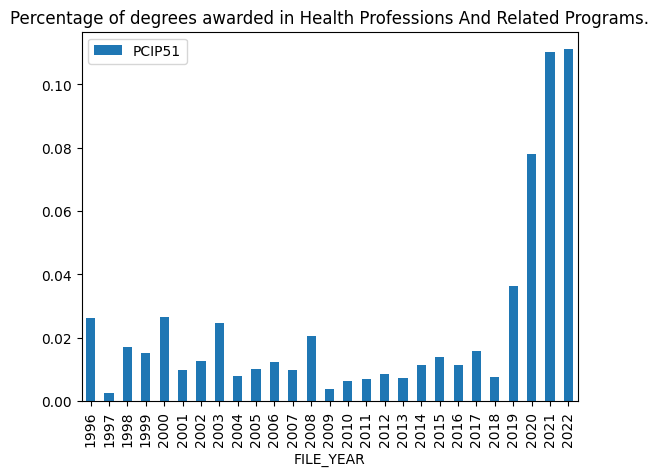

In [37]:
institution_all_years_carthage.plot(x='FILE_YEAR', y='PCIP51', kind='bar', title=institution_data_dictionary[institution_data_dictionary['VARIABLE NAME']=='PCIP51']['NAME OF DATA ELEMENT'].values[0])

<Axes: title={'center': 'Percentage of degrees awarded in Physical Sciences.'}, xlabel='FILE_YEAR'>

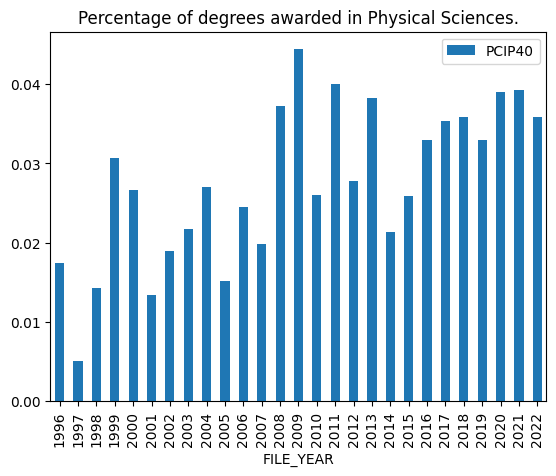

In [38]:
institution_all_years_carthage.plot(x='FILE_YEAR', y='PCIP40', kind='bar', title=institution_data_dictionary[institution_data_dictionary['VARIABLE NAME']=='PCIP40']['NAME OF DATA ELEMENT'].values[0])

<Axes: title={'center': 'Percentage of Degrees Awarded \n Physical Sciences (BLUE) vs Health Professions (ORANGE)'}, xlabel='FILE_YEAR'>

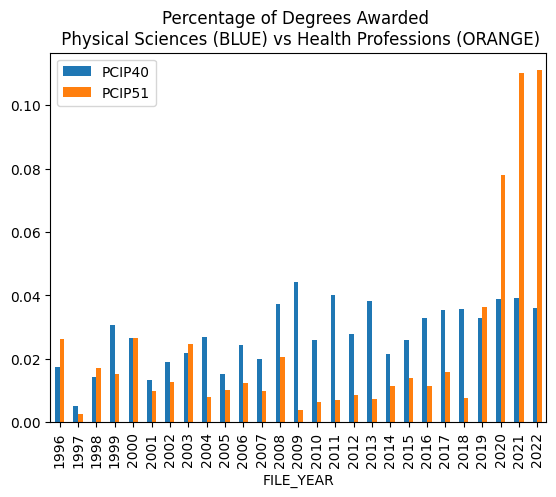

In [39]:
institution_all_years_carthage.plot(x='FILE_YEAR', y=['PCIP40', 'PCIP51'], kind='bar', title="Percentage of Degrees Awarded \n Physical Sciences (BLUE) vs Health Professions (ORANGE)")

<Axes: title={'center': 'Admission rate'}, xlabel='FILE_YEAR'>

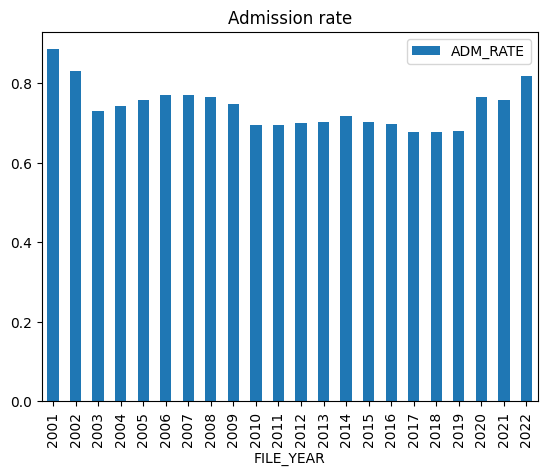

In [41]:
institution_all_years_carthage[institution_all_years_carthage.FILE_YEAR>2000].plot(x='FILE_YEAR', y='ADM_RATE', kind='bar', title=institution_data_dictionary[institution_data_dictionary['VARIABLE NAME']=='ADM_RATE']['NAME OF DATA ELEMENT'].values[0])

<Axes: title={'center': 'Median ACT Scores \n ENGLISH (BLUE) vs MATH (ORANGE)'}, xlabel='FILE_YEAR'>

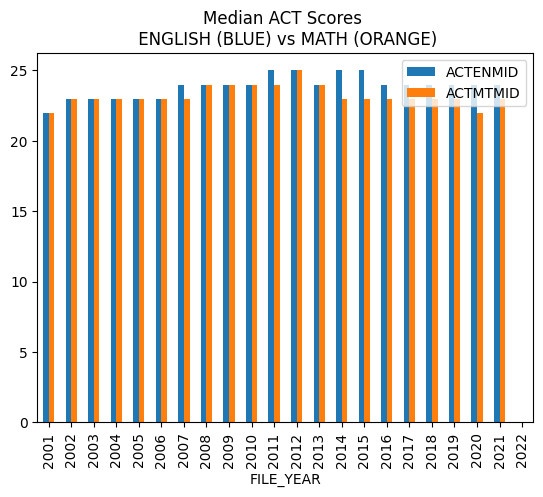

In [51]:
institution_all_years_carthage[institution_all_years_carthage.FILE_YEAR>2000].plot(x='FILE_YEAR', y=['ACTENMID', 'ACTMTMID'], kind='bar', title='Median ACT Scores \n ENGLISH (BLUE) vs MATH (ORANGE)')

<Axes: title={'center': 'Median SAT Scores \n VERBAL (BLUE) vs MATH (ORANGE)'}, xlabel='FILE_YEAR'>

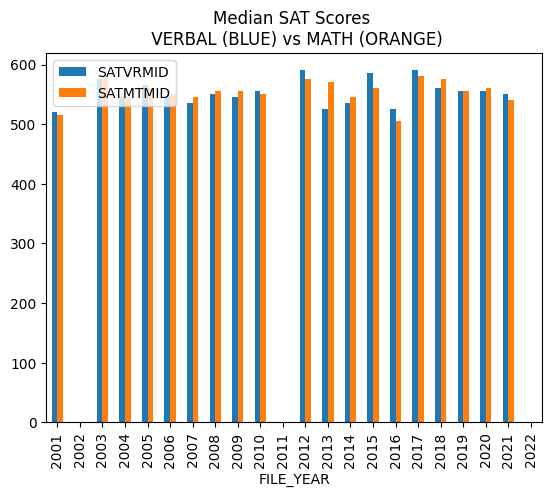

In [52]:
institution_all_years_carthage[institution_all_years_carthage.FILE_YEAR>2000].plot(x='FILE_YEAR', y=['SATVRMID','SATMTMID'], kind='bar', title='Median SAT Scores \n VERBAL (BLUE) vs MATH (ORANGE)')

<Axes: title={'center': 'Undergraduate Enrollment by Gender'}, ylabel='FILE_YEAR'>

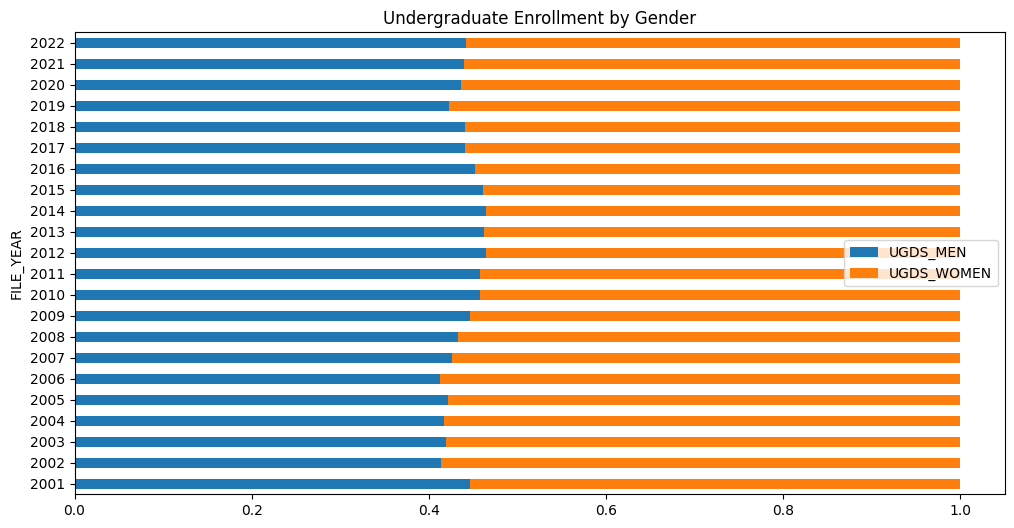

In [56]:
institution_all_years_carthage[institution_all_years_carthage.FILE_YEAR>2000].plot(
    x='FILE_YEAR', 
    y=['UGDS_MEN','UGDS_WOMEN'], 
    kind='barh', 
    stacked=True,
    title='Undergraduate Enrollment by Gender',
    figsize=(12,6)
)